In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# add new plot look theme
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6) # fixed fig size for all plots

In [ ]:
#load the dataset and load the first 5 rows
data = pd.read_csv('credit_card.csv')
print(data)

In [ ]:
#print 5 rows
print(data.head())

In [ ]:
#check the shape, column names, and summary of the dataset
print("shape of the dataset",data.shape)
print("column names:", data.columns.tolist())
print("summary statistics", data.describe()) 

In [ ]:
# identity and handle missing values (fill or drop based on the data type)
# check missing value
missing_values = data.isnull().sum()
print("missing values in each column:\n", missing_values)

In [ ]:
# check data type
print("data types of each column:\n",data.dtypes)

In [ ]:
# change transaction date to dateime
data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date'])#to_datetime function to chnge 

In [ ]:
# checking changed or not
print("data types of each column:\n",data.dtypes)

In [ ]:
# add new columns for year ,month, day
data['Year'] = data['Transaction_Date'].dt.year
data['Month'] = data['Transaction_Date'].dt.month
data['Day'] = data['Transaction_Date'].dt.day

In [ ]:
data.columns.to_list()

In [ ]:
d1 = data[['Transaction_Date','Year','Month','Day']] # [[ double bcoz if only one[ only one is run if you want more things add two[[
print(d1.head())

In [20]:
# retrive all transaction made in January 2025
jan_2025 = data[(data['Year']==2025) & (data['Month']==1)]
jan_2025
# export csv you can share it 
jan_2025.to_csv('January 2025 transactions.csv', index = False)

In [21]:
# find transaction where amount > 700 and transaction_tyoe is online
amt = data[(data['Amount'] > 700) & (data['Transaction_Type']=='Online')]
amt

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Type,Merchant,Category,Amount,Payment_Mode,Transaction_Status,Location,Year,Month,Day,Disount,Transaction_cat,Amount_category
6,7,103,2025-01-01,Online,Costco,Groceries,953.05,Debit Card,Pending,San Francisco,2025,1,1,905.3975,High,High
20,21,253,2025-01-01,Online,BestBuy,Entertainment,859.47,Debit Card,Pending,San Francisco,2025,1,1,816.4965,High,High
33,34,135,2025-01-02,Online,Walmart,Clothing,733.74,Debit Card,Approved,New York,2025,1,2,697.0530,High,High
58,59,271,2025-01-03,Online,eBay,Dining,703.64,Credit Card,Pending,Houston,2025,1,3,668.4580,High,High
86,87,28,2025-01-04,Online,Costco,Travel,724.83,Credit Card,Declined,Seattle,2025,1,4,688.5885,High,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,1152,154,2025-02-17,Online,Expedia,Health,902.89,Debit Card,Declined,Chicago,2025,2,17,857.7455,High,High
1157,1158,217,2025-02-18,Online,Amazon,Health,827.21,Debit Card,Pending,Los Angeles,2025,2,18,785.8495,High,High
1160,1161,42,2025-02-18,Online,eBay,Travel,800.78,Debit Card,Declined,San Francisco,2025,2,18,760.7410,High,High
1162,1163,39,2025-02-18,Online,BestBuy,Clothing,826.80,Credit Card,Pending,Seattle,2025,2,18,785.4600,High,High


In [22]:
# select only approved transaction from the data & give number of rows count where status is approved
approved = data[data['Transaction_Status'] == 'Approved']
print("Number of transactions:",len(approved))# only for one


Number of transactions: 399


In [23]:
# create a new column Discouted_amount, assuming a 5% on all transaction above 500.
data['Disount'] = data['Amount']
mask =data['Amount'] > 500
data.loc[mask,'Disount'] = data.loc[mask,'Amount'] * 0.95 #loc functon gives you location
print(data[['Amount','Disount']].head())


   Amount   Disount
0  360.10  360.1000
1  357.02  357.0200
2  829.41  787.9395
3  790.35  750.8325
4  311.26  311.2600


In [24]:
#Categorize the Transaction_Amount into Low, Medium, and High based on:
#Low: Below $100
#Medium: Between $100 - $500
#High: Above $500

data['Transaction_cat'] = data['Amount']
data.columns.to_list()

['Transaction_ID',
 'Customer_ID',
 'Transaction_Date',
 'Transaction_Type',
 'Merchant',
 'Category',
 'Amount',
 'Payment_Mode',
 'Transaction_Status',
 'Location',
 'Year',
 'Month',
 'Day',
 'Disount',
 'Transaction_cat',
 'Amount_category']

In [25]:
data['Transaction_cat'] = np.where(data['Amount'] < 100,'Low', np.where(data['Amount']  <= 500, 'Medium', 'High')
)
data

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Type,Merchant,Category,Amount,Payment_Mode,Transaction_Status,Location,Year,Month,Day,Disount,Transaction_cat,Amount_category
0,1,103,2025-01-01,ATM,BestBuy,Dining,360.10,Credit Card,Pending,San Francisco,2025,1,1,360.1000,Medium,Medium
1,2,271,2025-01-01,Online,eBay,Travel,357.02,Credit Card,Declined,Chicago,2025,1,1,357.0200,Medium,Medium
2,3,107,2025-01-01,ATM,Amazon,Entertainment,829.41,Credit Card,Pending,Chicago,2025,1,1,787.9395,High,High
3,4,72,2025-01-01,POS,Amazon,Groceries,790.35,Credit Card,Pending,Los Angeles,2025,1,1,750.8325,High,High
4,5,189,2025-01-01,ATM,Amazon,Clothing,311.26,Credit Card,Declined,San Francisco,2025,1,1,311.2600,Medium,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1196,282,2025-02-19,ATM,Costco,Clothing,75.80,Debit Card,Declined,Houston,2025,2,19,75.8000,Low,Low
1196,1197,86,2025-02-19,POS,Costco,Travel,576.00,Debit Card,Approved,Chicago,2025,2,19,547.2000,High,High
1197,1198,250,2025-02-19,ATM,Costco,Electronics,568.19,Debit Card,Approved,Chicago,2025,2,19,539.7805,High,High
1198,1199,270,2025-02-19,Online,BestBuy,Entertainment,878.64,Debit Card,Pending,San Francisco,2025,2,19,834.7080,High,High


In [26]:
# another method
#Categorize the Transaction_Amount into Low, Medium, and High based on:
#Low: Below $100
#Medium: Between $100 - $500
#High: Above $500
def amount_cat(x):
    if x < 100 :
        return "Low"
    elif x <= 500:
        return "Medium"
    else:
        return "High"

data['Amount_category'] = data['Disount'].apply(amount_cat)
print(data[['Amount','Disount','Amount_category']].head())

   Amount   Disount Amount_category
0  360.10  360.1000          Medium
1  357.02  357.0200          Medium
2  829.41  787.9395            High
3  790.35  750.8325            High
4  311.26  311.2600          Medium


In [ ]:
#Find the total transaction amount per Category
tot_amt_cat = data.groupby('Transaction_cat')['Amount'].sum()
print(tot_amt_cat)

tot_cat = data.groupby('Category')['Amount'].sum()
print(tot_cat)

In [27]:
#Determine the number of declined transactions per Payment_Mode
declimed_transactions = data[data['Transaction_Status'] == 'Declined']
print(declimed_transactions.count())
#method 2
tot_dec = data.groupby('Transaction_Status')['Amount'].count()
print(tot_dec)
#method 3
declined = data[data['Transaction_Status'] == 'Declined']
declined_by_mode = declined['Payment_Mode'].value_counts()
print("Number of Declined transactions per payment_mode:\n",declined_by_mode)

Transaction_ID        416
Customer_ID           416
Transaction_Date      416
Transaction_Type      416
Merchant              416
Category              416
Amount                416
Payment_Mode          416
Transaction_Status    416
Location              416
Year                  416
Month                 416
Day                   416
Disount               416
Transaction_cat       416
Amount_category       416
dtype: int64
Transaction_Status
Approved    399
Declined    416
Pending     385
Name: Amount, dtype: int64
Number of Declined transactions per payment_mode:
 Payment_Mode
Debit Card     216
Credit Card    200
Name: count, dtype: int64


In [28]:
#Identify the top 5 most frequent merchants based on transaction count
top_5_merchants=data['Merchant'].value_counts().head()
print(top_5_merchants)

Merchant
BestBuy    192
Target     179
eBay       177
Expedia    173
Amazon     171
Name: count, dtype: int64


In [29]:
#Find the average transaction amount per Location.
avg_amt_per_loc = (data.groupby('Location')['Amount'])
print(avg_amt_per_loc)

In [30]:
#checking customer info dataset
customer_info = pd.read_csv('customer_info.csv')
print(customer_info.head())
#Find customers who made more than 10 transactions in a single day (potential fraud)

data['Date'] = data['Transaction_Date'].dt.date
print(data['Date'].head())

# step 2 group by customer ID and date and count number of transactions
daily = data.groupby(['Customer_ID','Date']).size()
print(daily.head(10))

# step 3 filter customers with more than 10 transaction day
month_per_day = daily[daily > 2].reset_index()
print("Customers with more than transactiions in a single day:\n",month_per_day)


   Customer_ID  Age  Gender Account_Status
0            1   66    Male       Inactive
1            2   53  Female      Suspended
2            3   40  Female      Suspended
3            4   49   Other       Inactive
4            5   27   Other      Suspended
0    2025-01-01
1    2025-01-01
2    2025-01-01
3    2025-01-01
4    2025-01-01
Name: Date, dtype: object
Customer_ID  Date      
1            2025-01-16    1
             2025-01-23    1
             2025-01-24    1
             2025-01-27    1
             2025-01-30    1
             2025-02-04    1
             2025-02-05    1
             2025-02-09    1
2            2025-01-03    1
             2025-01-08    1
dtype: int64
Customers with more than transactiions in a single day:
    Customer_ID        Date  0
0          104  2025-02-06  3
1          113  2025-01-07  3
2          157  2025-02-07  4
3          173  2025-01-23  3


In [39]:
#Find transactions where Amount > $500 and Transaction_Type is Online (flag as high-risk).
high_risk = data[(data['Amount'] > 500) & (data['Transaction_Type'] == 'Online')]
print(high_risk.count())

Transaction_ID        209
Customer_ID           209
Transaction_Date      209
Transaction_Type      209
Merchant              209
Category              209
Amount                209
Payment_Mode          209
Transaction_Status    209
Location              209
Year                  209
Month                 209
Day                   209
Disount               209
Transaction_cat       209
Amount_category       209
Date                  209
dtype: int64


In [35]:
data.columns.to_list()

['Transaction_ID',
 'Customer_ID',
 'Transaction_Date',
 'Transaction_Type',
 'Merchant',
 'Category',
 'Amount',
 'Payment_Mode',
 'Transaction_Status',
 'Location',
 'Year',
 'Month',
 'Day',
 'Disount',
 'Transaction_cat',
 'Amount_category',
 'Date']

In [40]:
#Suppose you have another dataset (customer_info.csv) containing Customer_ID, Age, Gender, and Account_Status.
#Merge it with credit_card_transactions.csv using an appropriate join operation.
customer_info = pd.read_csv('customer_info.csv')
print(customer_info.head())
print(data.head())

   Customer_ID  Age  Gender Account_Status
0            1   66    Male       Inactive
1            2   53  Female      Suspended
2            3   40  Female      Suspended
3            4   49   Other       Inactive
4            5   27   Other      Suspended
   Transaction_ID  Customer_ID Transaction_Date Transaction_Type Merchant  \
0               1          103       2025-01-01              ATM  BestBuy   
1               2          271       2025-01-01           Online     eBay   
2               3          107       2025-01-01              ATM   Amazon   
3               4           72       2025-01-01              POS   Amazon   
4               5          189       2025-01-01              ATM   Amazon   

        Category  Amount Payment_Mode Transaction_Status       Location  Year  \
0         Dining  360.10  Credit Card            Pending  San Francisco  2025   
1         Travel  357.02  Credit Card           Declined        Chicago  2025   
2  Entertainment  829.41  Credit Car

In [41]:
#data merging and joining 
data_full = pd.merge(data, customer_info, on ='Customer_ID')

In [42]:
# exporting results
# save the cleaned and processed dataset to a new CSV file
data_full.to_csv('full_data.csv', index = False)

In [45]:
#checl the null value
data_full.head()
data_full.isnull().sum()

Transaction_ID        0
Customer_ID           0
Transaction_Date      0
Transaction_Type      0
Merchant              0
Category              0
Amount                0
Payment_Mode          0
Transaction_Status    0
Location              0
Year                  0
Month                 0
Day                   0
Disount               0
Transaction_cat       0
Amount_category       0
Date                  0
Age                   0
Gender                0
Account_Status        0
dtype: int64

In [51]:
#Find the average transaction amount per Age group.
bin_edges = [18,35,45,60,120]
labels = ["18-30","31-45","46-60","60+"]
data_full['Age_Group'] = pd.cut(data_full['Age'],bins=bin_edges,labels=labels,include_lowest=True)
avg_per_age = data_full.groupby('Age_Group')['Amount'].mean().round(2)
print("Average transaction amount per Age group:\n",avg_per_age)

Average transaction amount per Age group:
 Age_Group
18-30    494.21
31-45    513.58
46-60    486.42
60+      485.45
Name: Amount, dtype: float64


C:\Users\MALHAR\AppData\Local\Temp\ipykernel_11532\3353637203.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_per_age = data_full.groupby('Age_Group')['Amount'].mean().round(2)


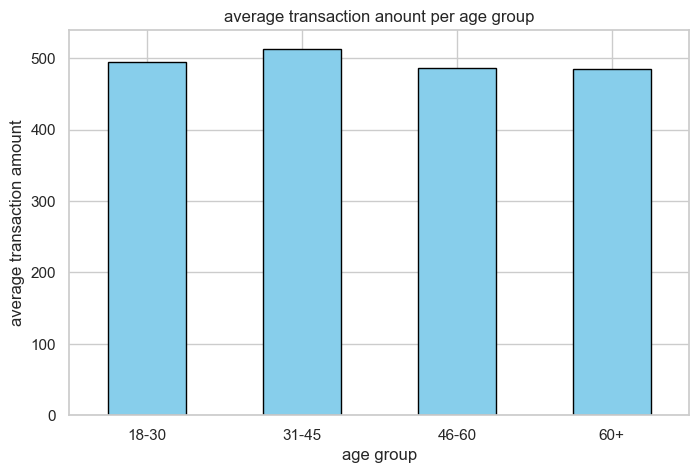

In [52]:
plt.figure(figsize=(8,5))
avg_per_age.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("average transaction anount per age group")
plt.xlabel("age group")
plt.ylabel("average transaction amount")
plt.xticks(rotation=360)
plt.show()

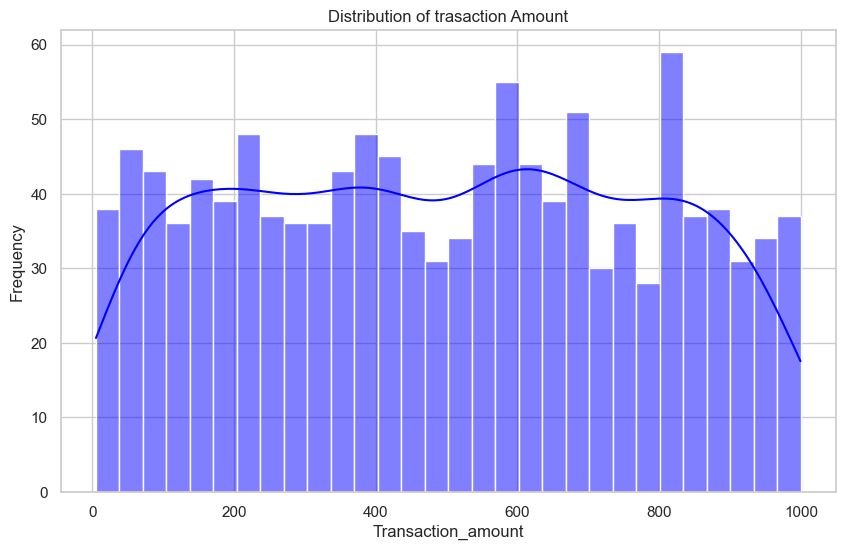

In [54]:
sns.histplot(data_full['Amount'], bins =30, kde=True,color='blue')
plt.title("Distribution of trasaction Amount")
plt.xlabel("Transaction_amount")
plt.ylabel("Frequency")
plt.show()
           

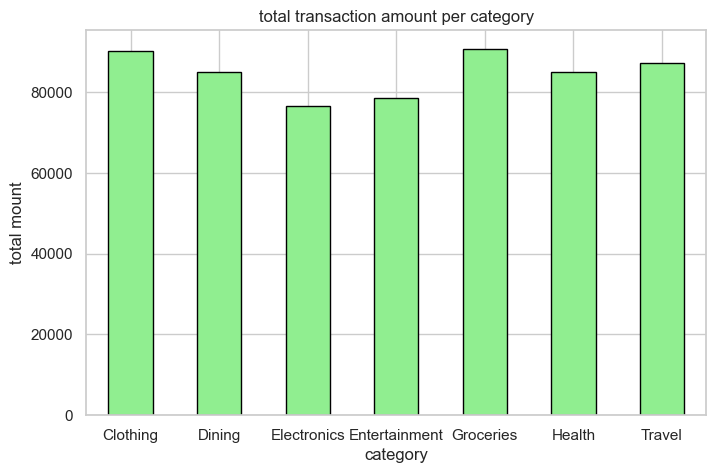

In [56]:
#bar chart
total_cat = data_full.groupby('Category')['Amount'].sum()
plt.figure(figsize=(8,5))
total_cat.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("total transaction amount per category")
plt.xlabel("category")
plt.ylabel("total mount")
plt.xticks(rotation=360)
plt.show()

In [61]:
# high risk by age group
plt.figure(figsize=(5,8))
sns.scatterplot(data=data_full, x="Age", y="Amount" , hue="high_risk", palette={True: 'red', False:'green'})
plt.title("Transaction amount vs age with high risk indicator")
plt.xlabel("Age")
plt.ylabel("Transaction amount")
plt.show()

ValueError: Could not interpret value `high_risk` for `hue`. An entry with this name does not appear in `data`.

<Figure size 500x800 with 0 Axes>